In [187]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [188]:
df = pd.read_csv('io-bytes-control-group.csv')
df

,vms,bytesIn,bytesOut
0,10,175738,256359
1,10,172706,252652
2,20,1236708,1543554
3,20,1297012,1617267
4,30,3313888,3832667
5,30,3386892,3897552
6,40,5208559,5847741
7,50,7457614,8007348


In [189]:
df.corr()

,vms,bytesIn,bytesOut
vms,1.000000,0.992559,0.995782
bytesIn,0.992559,1.000000,0.999241
bytesOut,0.995782,0.999241,1.000000


In [190]:
df = df.dropna() # drop all rows that have NAN/none
df['sum'] = (df['bytesIn']+df['bytesOut'])/1024/1024
df

,vms,bytesIn,bytesOut,sum
0,10,175738,256359,0.412080
1,10,172706,252652,0.405653
2,20,1236708,1543554,2.651464
3,20,1297012,1617267,2.779273
4,30,3313888,3832667,6.815486
5,30,3386892,3897552,6.946987
6,40,5208559,5847741,10.544109
7,50,7457614,8007348,14.748537


In [191]:
x_data = df.iloc[:,:1]   # 첫 열만
y_data = df.iloc[:,[-1]]  # 마지막 열만

scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform( y_data )

In [192]:
x = torch.FloatTensor(x_dataN) # 특성 데이터
y = torch.FloatTensor(y_dataN) # 라벨

In [193]:
model = Sequential()
model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[0.4267]], requires_grad=True),
 Parameter containing:
 tensor([-0.5957], requires_grad=True)]

In [194]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [195]:
hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 0.659709095954895
1 0.44617700576782227
2 0.27584603428840637
3 0.14863209426403046
4 0.06310959160327911
5 0.015926143154501915
6 0.0012782926205545664
7 0.010811436921358109
8 0.03438199311494827
9 0.061766546219587326
10 0.08468051999807358
11 0.09811105579137802
12 0.1004706472158432
13 0.0928570106625557
14 0.078000508248806
15 0.05930441990494728
16 0.040121451020240784
17 0.023261601105332375
18 0.010686859488487244
19 0.0033613278064876795
20 0.0012455116957426071
21 0.0034330945927649736
22 0.008416250348091125
23 0.014437157660722733
24 0.019853943958878517
25 0.023440204560756683
26 0.024557312950491905
27 0.02317962609231472
28 0.019793130457401276
29 0.01521272398531437
30 0.01036922074854374
31 0.006110328249633312
32 0.0030478513799607754
33 0.00147109548561275
34 0.001333931926637888
35 0.0023103307466953993
36 0.0039008278399705887
37 0.005562680307775736
38 0.0068327076733112335
39 0.007416061125695705
40 0.007224950939416885
41 0.006365535315126181
42 0.00508339237

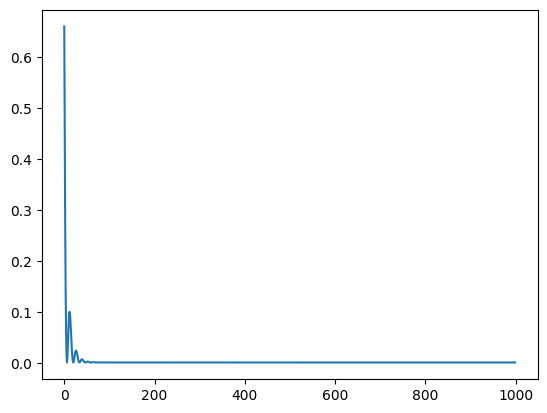

In [196]:
plt.plot(hist)
plt.show()

In [197]:
model[0].weight

Parameter containing:
tensor([[1.0043]], requires_grad=True)

In [198]:
model[0].bias

Parameter containing:
tensor([-0.0414], requires_grad=True)

In [199]:
# model( torch.FloatTensor([[15]]))
predN = model(x).detach().numpy()
pred = scaleL.inverse_transform(predN)
pred

array([[-0.18867047],
       [-0.18867047],
       [ 3.4123259 ],
       [ 3.4123259 ],
       [ 7.0133224 ],
       [ 7.0133224 ],
       [10.614319  ],
       [14.215316  ]], dtype=float32)

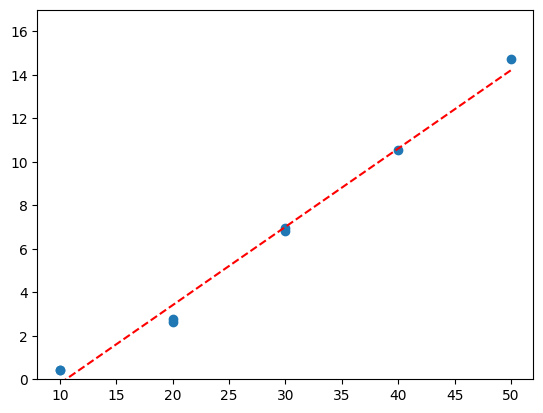

In [203]:
plt.ylim([0,17])
plt.scatter(x_data, y_data)
plt.plot(x_data, pred, 'r--') # r-- : Red, dashed line
plt.show()